# Gradient Descent

Gradient descent algorithms underlie most of the optimization in Machine Learning. In this notebook we will go through some simple examples of how gradient descent is implemented, and the application of this to linear regression.

We will use the [Diabetes dataset](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/blob/main/Machine-Learning/SGD/Diabetes_Data.csv). Make sure you download this file and save it or upload this to your working directory.

## Contents

* Vanilla Gradient Descent
* Application to Linear Regression
* Exercises

## Vanilla Gradient Descent

Consider that we have $n$ independent features, which are denoted by $x_1, \dots, x_n$, and a function $V(x_1,\dots,x_n)$ which we want to minimize. If we have have a function $W(x_1,\dots,x_n)$ that we want to maximize, then let $V = -W$ and minimizing $V$ is equivalent to maximizing $W$.

Since the name includes gradient, we first need to define the gradient. This is simply a vector which consists of all the first partial derivatives of the function $V$:

$$
\nabla V ({\textbf x}) = \left( \frac{\partial V}{\partial x_1}, \dots, \frac{\partial V}{\partial x_n}\right).
$$

Recall that the partial derivative simply corresponds to the derivative with respect to that variable, with all other variables held constant.

The first observation that we can make about a function that we want to minimize is that the gradient of the function at a point is in the direction that the function increases fastest. Hence, in the opposite direction the function will **decrease** the fastest. Therefore the most sensible direction to minimize the function is in the opposite direction to the gradient, and consequently we can let

$$
{\textbf x}^{(n+1)} = {\textbf x}^{(n)} - \eta \nabla V ({\textbf x}^{(n)}).
$$

This forms the basis of the gradient descent method, and the parameter $\eta > 0$ is called the learning rate. This is known as an **iterative method**. We have seen these types of methods previously, e.g., the k-Nearest Neighbours method.

The following short function implements gradient descent. It takes as input a function which calculates the gradient, a starting point, a learning rate, the maxiumum number of iterations to take and the tolerance. Once the increments for the points decrease by less than the tolerance the algorithm returns the optimal value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1.e-6):
    vector = start
    for n in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.sum(np.abs(diff)) <= tolerance:
            break
        vector = vector+diff
    return vector

To implement this method we use as input the gradient of the quadratic function $V=x^2$. In this case the gradient is just the scalar $2x$. We do one iteration on each call to the gradient descent function, to enable plotting of the evolution of the updates. In this case for a small learning rate, the solution converges monotonically to the minimum at $x=0$.

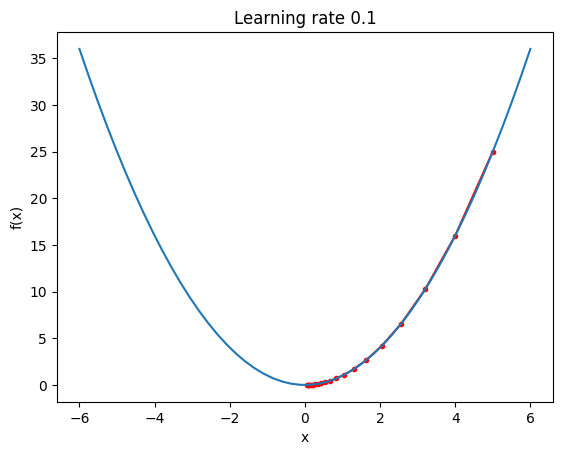

In [2]:
quad_grad = lambda v: 2 * v
quad = lambda v: v**2

xa = np.zeros((21))
xs = 5
xa[0] = xs
lrate = 0.1
for ix in range(20):
    xc = gradient_descent(quad_grad,xs,lrate,n_iter=1)
    xa[ix+1] = xc
    xs = xc

xf = np.linspace(-6,6)
plt.plot(xa, quad(xa), 'r.-')
plt.plot(xf, quad(xf))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f"Learning rate %g" % lrate);

If we make the learning rate larger, the iterations now oscillate between either side of the function, and the convergence is much slower. If the learning rate is larger than 1 for this example, the iterations will diverge.

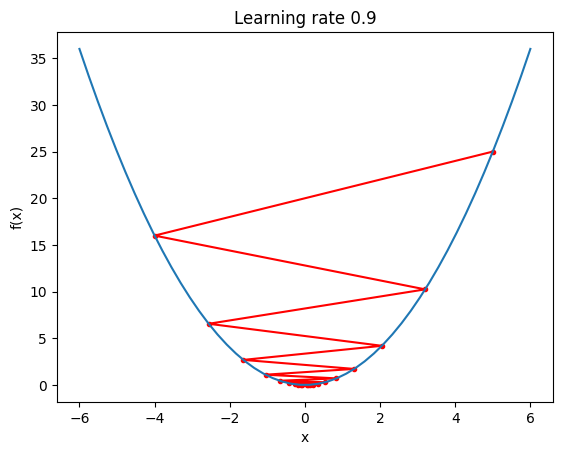

In [3]:
xa = np.zeros((21))
xs = 5
xa[0] = xs
lrate = 0.9
for ix in range(20):
    xc = gradient_descent(quad_grad,xs,lrate,n_iter=1)
    xa[ix+1] = xc
    xs = xc

xf = np.linspace(-6,6)
plt.plot(xa, quad(xa), 'r.-')
plt.plot(xf, quad(xf))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f"Learning rate %g" % lrate);

One problem that often occurs with gradient descent is that the solution can converge to a local minimum. For example, for the quartic function below we see that the solution converges to the local minimum at $x\approx 1$. Whereas for a learning rate of half the given value the solution will converge to the global minimum.

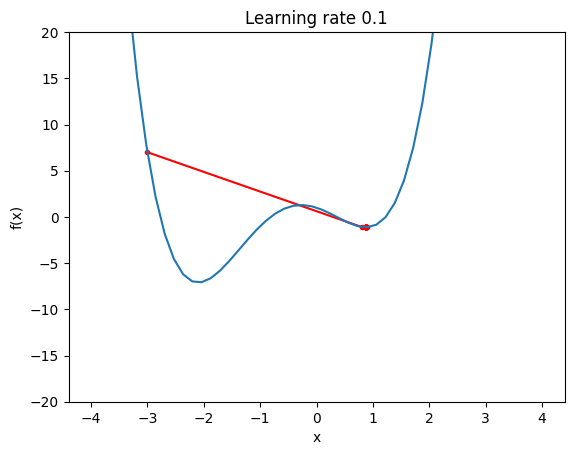

In [4]:
quart_grad = lambda x: 4*x**3+6*x**2-6*x-2
quart = lambda x: x**4+2*x**3-3*x**2-2*x+1

xa = np.zeros((21))
xs = -3
xa[0] = xs
lrate = 0.1
for ix in range(20):
    xc = gradient_descent(quart_grad,xs,lrate,n_iter=1)
    xa[ix+1] = xc
    xs = xc

xf = np.linspace(-4,4)
plt.plot(xa, quart(xa), 'r.-')
plt.plot(xf, quart(xf))
plt.ylim(-20,20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f"Learning rate %g" % lrate);

We can investigate convergence of gradient descent for functions of two variables. In this case the gradient will be a two-dimensional vector. Consider first a simple ellipse. In this case if we track the iterations, at each point the line to the next point is perpendicular to the contours, which is the direction of the gradient. Here a constant learning rate has been used, and consequently the iterations zig-zag about the minimum and never reach the minimum. If we add a mild decay to the learning rate, the solution eventually converges to the minimum.

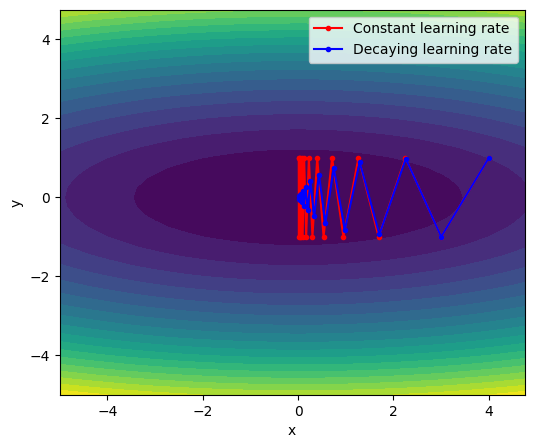

In [5]:
def ellipse(x):
    ellipse = .125*x[0]**2 + x[1]**2
    return ellipse

def ellipse_grad(x):
    ellipse_grad = np.array([.25*x[0], 2*x[1]])
    return ellipse_grad

xa = np.zeros((21, 2))
xs = np.array([4,1])
xa[0] = xs
lrate = 1.
decay = .0
for ix in range(20):
    lr = lrate/(1+decay*ix)
    xc = gradient_descent(ellipse_grad,xs,lr,n_iter=1)
    xa[ix+1] = xc
    xs = xc

xb = np.zeros((21, 2))
xs = np.array([4,1])
xb[0] = xs
lrate = 1.
decay = .01
for ix in range(20):
    lr = lrate/(1+decay*ix)
    xc = gradient_descent(ellipse_grad,xs,lr,n_iter=1)
    xb[ix+1] = xc
    xs = xc

fig, ax = plt.subplots(figsize=(6,5)) # initialise the plots and axes

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = ellipse(np.column_stack([X.ravel(), Y.ravel()]).T)
Z = Z.reshape(X.shape)
# Plot the surface.
ax.contourf(X, Y, Z, 21)
plt.plot(xa[:,0], xa[:,1], 'r.-', label='Constant learning rate')
plt.plot(xb[:,0], xb[:,1], 'b.-', label='Decaying learning rate')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

If we halve the learning rate, but don't include a decay rate, the iterations now converge rapidly to the minimum.

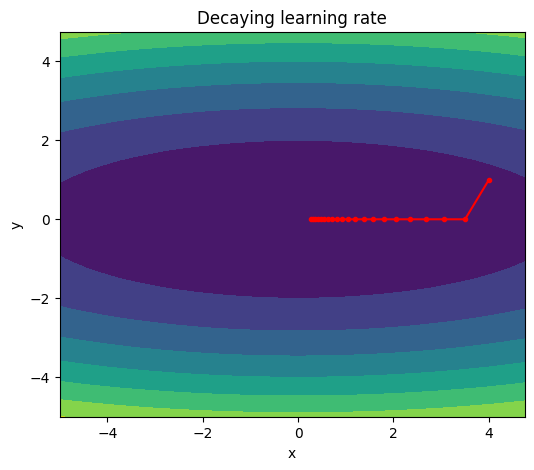

In [6]:
xa = np.zeros((21, 2))
xs = np.array([4,1])
xa[0] = xs
lrate = .5
decay = .0
for ix in range(20):
    lr = lrate/(1+decay*ix)
    xc = gradient_descent(ellipse_grad,xs,lr,n_iter=1)
    xa[ix+1] = xc
    xs = xc

fig, ax = plt.subplots(figsize=(6,5)) # initialise the plots and axes

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = ellipse(np.column_stack([X.ravel(), Y.ravel()]).T)
Z = Z.reshape(X.shape)
# Plot the surface.
ax.contourf(X, Y, Z)
plt.plot(xa[:,0], xa[:,1], 'r.-')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Decaying learning rate");

We can consider a more complicated function which have multiple minima and saddle points. In this example the solution that we converge to again depends on the starting point, even though the starting points are quite close.

function minimum is -10.875


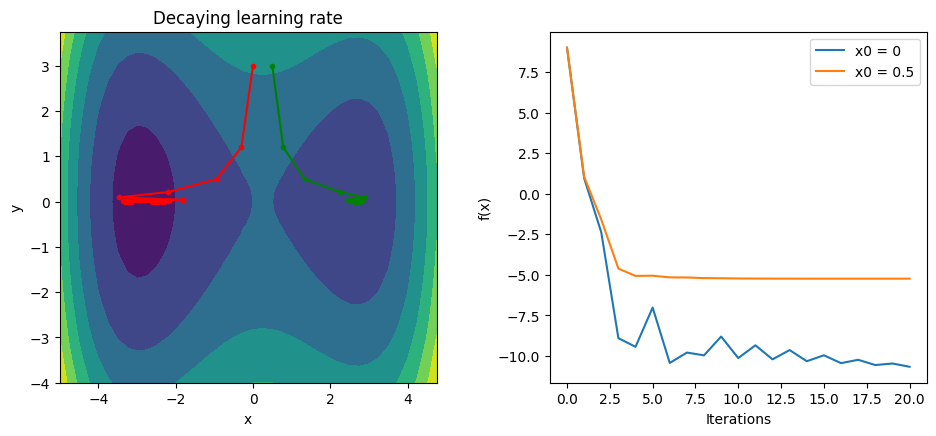

In [7]:
def spoint(x):
    ellipse = 1/8*x[0]**4 - 2*x[0]**2+x[0]+x[1]**2
    return ellipse

def spoint_grad(x):
    ellipse_grad = np.array([.5*x[0]**3-4*x[0]+1, 2*x[1]])
    return ellipse_grad

xa = np.zeros((21, 2))
xs = np.array([0, 3])
xa[0] = xs
lrate = .3
decay = .02
for ix in range(20):
    lr = lrate/(1+decay*ix)
    xc = gradient_descent(spoint_grad,xs,lr,n_iter=1)
    xa[ix+1] = xc
    xs = xc

xb = np.zeros((21, 2))
xs = np.array([.5, 3])
xb[0] = xs
lrate = .3
decay = .02
for ix in range(20):
    lr = lrate/(1+decay*ix)
    xc = gradient_descent(spoint_grad,xs,lr,n_iter=1)
    xb[ix+1] = xc
    xs = xc

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5)) # initialise the plots and axes

# # Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = spoint(np.column_stack([X.ravel(), Y.ravel()]).T)
Z = Z.reshape(X.shape)
print('function minimum is',Z.min())
# Plot the surface.
ax1.contourf(X, Y, Z)

ax1.plot(xa[:,0], xa[:,1], 'r.-')
ax1.plot(xb[:,0], xb[:,1], 'g.-')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Decaying learning rate')
ax2.plot(spoint(xa.T), label='x0 = 0')
ax2.plot(spoint(xb.T), label='x0 = 0.5')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('f(x)')
ax2.legend();
fig.tight_layout(pad=3.0);

## Application to Linear Regression

Now import the Diabetes dataset. This consists of four physiological measurements, six blood serum measurements and the tendency to develop Diabetes one year after the measurements were taken. Hence, this is a regression problem, where we aim to predict the tendency 'Y' from the other variables.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/csv files/Diabetes_Data.csv') # read the Diabetes dataset in to a pandas dataframe
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To illustrate the implementation of gradient descent we create a two-dimensional feature set with just the fields 'BMI' and 'BP'. As always we normalize the variables to improve the stability of the model. The target variable is stored in a data series 'Y'.

In [11]:
X = df[['BMI', 'BP']]
X = (X-X.mean())/X.std()
Y = df['Y']

We then split the dataset into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)


To implement gradient descent we need to specify the function that is to be miminized and then calculate the gradient of this function. For linear regression the model creates a linear function

$$
y_m^{(i)} = a_1 x_1^{(i)} + a_2 x_2^{(i)} + b,
$$

where in this case $x_1$ and $x_2$ correspond respectively to 'BMI' and 'BP. The aim is to choose the unknowns $a_1$, $a_2$ and $b$ which minimize the Mean Square Error:

$$
E = \sum_{i=1}^M (y_m^{(i)}-y^{(i)})^2,
$$

where $M$ is the number of instances in the dataset and $y^{(i)}$ are the observations.

To calculate the gradient of $E$ with respect to the unknowns $a_1$, $a_2$ and $b$, we can use the Chain Rule, since $E$ is only dependent on this variables through $y_m^{(i)}$. For example the partial derivative with respect to $b$ is

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^M \frac{\partial y_m^{(i)}}{\partial b} 2(y_m^{(i)}-y^{(i)})
= \sum_{i=1}^M 2(y_m^{(i)}-y^{(i)}).
$$

Similarly,

$$
\frac{\partial E}{\partial a_1} = \sum_{i=1}^M \frac{\partial y_m^{(i)}}{\partial a_1} 2(y_m^{(i)}-y^{(i)})
= \sum_{i=1}^M x_1^{(i)} 2(y_m^{(i)}-y^{(i)}),
$$

and therefore the gradient is

$$
\nabla E = \left(\sum_{i=1}^M x_1^{(i)} 2(y_m^{(i)}-y^{(i)}), \sum_{i=1}^M x_2^{(i)} 2(y_m^{(i)}-y^{(i)}), \sum_{i=1}^M 2(y_m^{(i)}-y^{(i)}) \right).
$$

The two functions below calculate the error and the gradient respectively, where $a = (a_1,a_2,b)$.

In [13]:
def MSE(a):
    yp = a[0]*X_train.iloc[:,0]+a[1]*X_train.iloc[:,1]+a[2]-Y_train
    MSE = np.sum(yp**2)
    return MSE

def MSE_grad(a):
    yp = a[0]*X_train.iloc[:,0]+a[1]*X_train.iloc[:,1]+a[2]-Y_train
    MSE_grad = np.array([2*np.sum(yp*X_train.iloc[:,0]),
                         2*np.sum(yp*X_train.iloc[:,1]),
                         2*np.sum(yp)])
    return MSE_grad

Now we can use gradient descent to solve for the unknowns of the model. For the given decay rate the model converges smoothly, and the evaluation of the function appears to show the function reaching a minimum. Note that we have only plotted the projection of the evolution of the model in $(a_1,a_2)$ space.

Model coefficients are  [ 35.157  26.541 139.42 ]


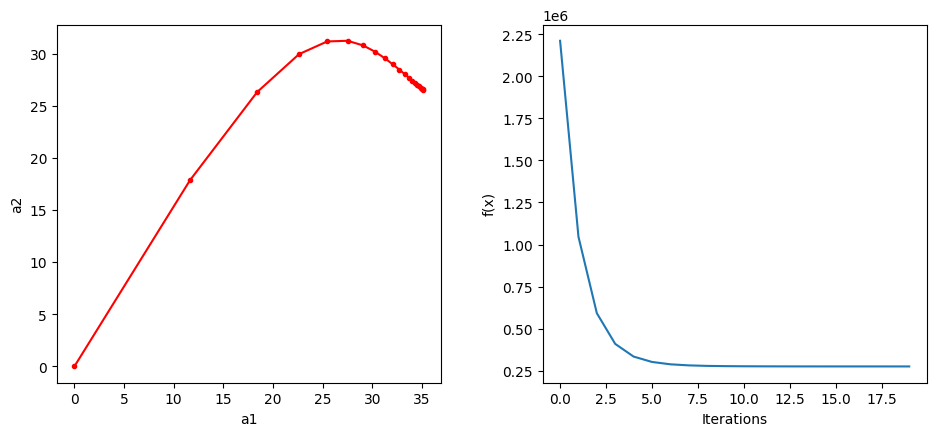

In [14]:
xa = np.zeros((21, 3))
xs = np.array([.0,.0,.0])
xa[0] = xs
lrate = .002
decay = .0
for ix in range(20):
    lr = lrate/(1+decay*ix)
    xc = gradient_descent(MSE_grad,xs,lr,n_iter=1)
    xa[ix+1] = xc
    xs = xc

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5)) # initialise the plots and axes

# # Make data.
ax1.plot(xa[:,0], xa[:,1], 'r.-')
E = np.zeros((20,))
for ix in range(20):
    E[ix] = MSE(xa[ix,:])

ax2.plot(E)
print('Model coefficients are ',np.round(xa[20,:],3))

ax1.set_xlabel('a1')
ax1.set_ylabel('a2')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('f(x)')
fig.tight_layout(pad=3.0);

We can compare the effectiveness of the model by plotting the predictions against observations, and calculating the correlation. As can be seen the model is reasonably effective, given that we have only used two features.

Correlation is 0.619


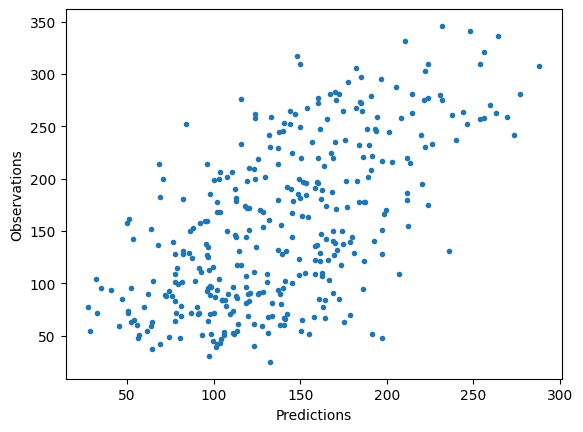

In [15]:
a = xa[20,:]
yp = a[0]*X_test.iloc[:,0]+a[1]*X_test.iloc[:,1]+a[2]
plt.plot(yp,Y_test,'.')
plt.xlabel('Predictions')
plt.ylabel('Observations')

print('Correlation is',np.round(np.corrcoef(yp, Y_test)[0,1],3))

## Exercises

### Exercise 1 (10 marks)

For linear regression with lasso regularization, the function to be minimized is

$$
E = \sum_{i=1}^M (y_m^{(i)}-y^{(i)})^2 + \alpha (|a_1|+|a_2|+\cdots+|a_n|+|b|),
$$

where

$$
y_m^{(i)} = a_1 x_1^{(i)} + a_2 x_2^{(i)}+ \cdots+  a_n x_n^{(i)} + b,
$$

and $\alpha$ is the penalty weight.

Repeat the calculations for the Diabetes dataset, but this time also include the blood serum measurement 'S5' and use lasso regularization with $\alpha=2$. You should include the model coefficients and the correlation between the predicted and observed values for the training set.

The derivative of $|x|$ is $\hbox{sign} (x)$, which is $-1$ for $x<0$ and $1$ for $x\ge 0$, and can be calculated using the function `np.sign()`.


In [18]:
X = df[['BMI', 'BP','S5']]
X = (X-X.mean())/X.std()
Y = df['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, RepeatedKFold

In [23]:
lasso = Lasso(alpha=2)
lasso.fit(X_train,Y_train)
lasso_training_score = lasso.score(X_train,Y_train)
preds_linear = lasso.predict(X_test)
lasso_rsquared = r2_score(Y_test,preds_linear)

print(f'Training score is {np.max(lasso_training_score):.3f}')
print(f'Testing score is {np.max(lasso_rsquared):.3f}')

Training score is 0.456
Testing score is 0.407


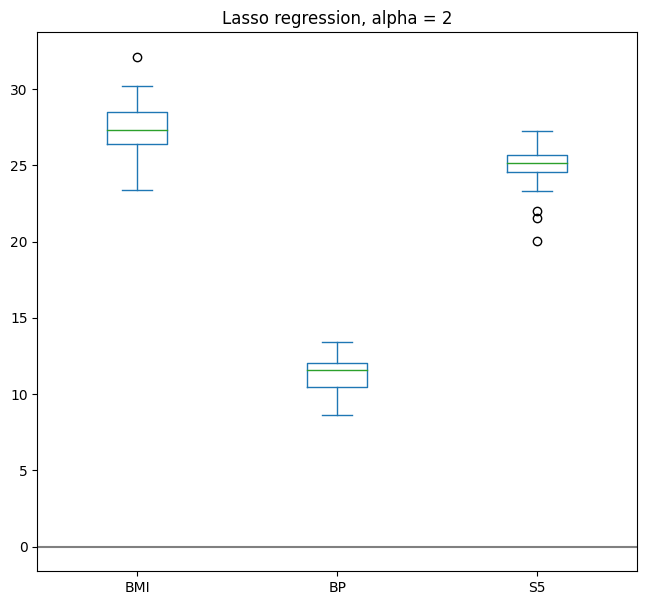

In [28]:
scores = cross_validate(
    Lasso(alpha = 2), X, Y,
    cv=RepeatedKFold(n_splits = 5, n_repeats = 5),
    return_estimator = True
)

coefs = pd.DataFrame([est.coef_ for est in scores['estimator']], columns = X.columns)

ax = coefs.plot(kind='box',figsize=(10,7))
plt.title('Lasso regression, alpha = 2')
plt.axhline(y=0, color='.5')
plt.subplots_adjust(left=.3)

### Generative AI Acknowledgement

If you used generative AI to assist you with these excercises, document your use below following the guidelines here: https://www.monash.edu/learnhq/build-digital-capabilities/create-online/acknowledging-the-use-of-generative-artificial-intelligence